In [9]:
#Task 1

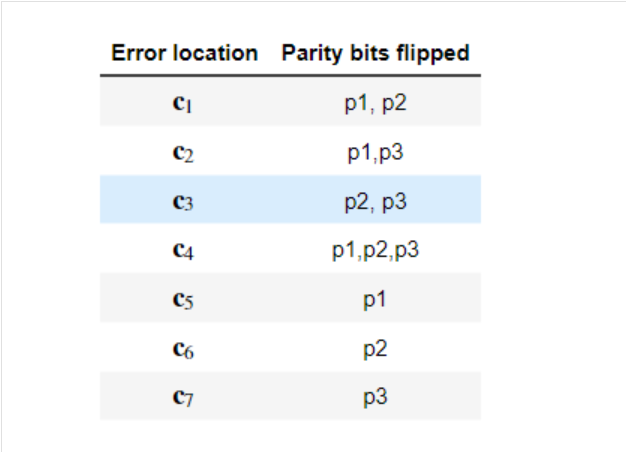

In [21]:
from random import randint
import numpy as np
def random_message(k):
    return np.array([randint(0,1) for _ in range(k)], dtype=int)
    
random_message(4)

array([0, 0, 1, 1])

In [5]:
# Task 2

In [22]:
G = np.array([
    [ 1 , 0 , 0 , 0 , 1 , 1 , 0 ],
    [ 0 , 1 , 0 , 0 , 1 , 0 , 1 ],
    [ 0 , 0 , 1 , 0 , 0 , 1 , 1 ],
    [ 0 , 0 , 0 , 1 , 1 , 1 , 1 ]], dtype=int)

def hamming_encode(message):
    return (m@G % 2)


m = random_message(4)
c = hamming_encode(m)

hamming_encode(m)

array([1, 0, 0, 1, 0, 0, 1], dtype=int32)

In [6]:
# Task 3

In [23]:
def noise_channel(c, p):
    import random
    from random import randint
    corrupted_c = ''
    def summ(b):    #user defined function to get the sum of message string and corrupted string. 
        sum = 0
        for i in range(len(b)):
            sum = sum + b[i]
        return sum
           
    for i in c:
        
        if random.random() < p:
            if i == '0':
                corrupted_c += '1'
            else:
                corrupted_c += '0'
        else:
            corrupted_c += str(i)
        cor = np.array(list(corrupted_c), dtype = int) #changing corrupted_c string to integer.
        if summ(cor) > (summ(c) + 2):
            break            
    return cor
c = hamming_encode(4) # c is not hamming_encode
corrupted_c = noise_channel(c, 0.5) #function call
print('corrupted c =', corrupted_c)
print('message=', c)
cor = np.array(list(corrupted_c), dtype = int)
#print(summ(cor))
#print(summ(c))

corrupted c = [0 0 0 1 0 0 1]
message= [1 0 0 1 0 0 1]


In [7]:
# Task-2 (actual one)

In [19]:
def noise_channel(c, p):
    import random
    from random import randint
    corrupted_c = ''
    
    for i in c:
        
        if random.random() < p:
            if i == '0':
                corrupted_c += '1'
            else:
                corrupted_c += '0'
        else:
            corrupted_c += str(i)
            
    return np.array(list(corrupted_c), dtype = int)

c = random_message(7) # c is not hamming_encode
corrupted_c = noise_channel(c, 0.5) #function call
print('corrupted c =', corrupted_c)
print('message=', c)

corrupted c = [0 0 0 1 0 0 0]
message= [1 0 1 1 0 1 1]


In [4]:
# Task 4

In [24]:
H = np.array([
    [1, 1, 0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0, 1, 0],
    [0, 1, 1, 1, 0, 0, 1]], dtype=int) #(3*7)

In [31]:
def hamming_syndrome(corrupted_c):
    import random
    import numpy as np
    
    C = corrupted_c
    a = C.T
    
    s = (H@a % 2)
    return s

hamming_syndrome(corrupted_c)
S = hamming_syndrome(corrupted_c)
print(S)
#print('error syndrome', hamming_syndrome(corrupted_c))

[1 1 0]


In [3]:
# Task 5

In [33]:
# write your code here ()
import numpy as np
# key is syndrome
# value is the error
error_syndromes = dict()

# np.arrays can't be keys for dict
# So we need to convert them to tuples

# zero error case
s = np.array([0,0,0], dtype=int)
e = np.array([0,0,0,0,0,0,0], dtype=int)

#first bit error case
s1 = np.array([1,1,0], dtype=int)
e1 = np.array([1,0,0,0,0,0,0], dtype=int)

#error in the 2nd bit
s2 = np.array([0,1,1], dtype=int)
e2 = np.array([0,1,0,0,0,0,0], dtype=int)

#error in the 3rd bit
s3 = np.array([1,0,1], dtype=int)
e3 = np.array([0,0,1,0,0,0,0], dtype=int)

#error in the 4th bit
s4 = np.array([1,1,1], dtype=int)
e4 = np.array([0,0,0,1,0,0,0], dtype=int)

#error in the 5th bit
s5 = np.array([1,0,0], dtype=int)
e5 = np.array([0,0,0,0,1,0,0], dtype=int)

#error in the 6th bit
s6 = np.array([0,1,0], dtype=int)
e6 = np.array([0,0,0,0,0,1,0], dtype=int)

#error in the 7th bit
s7 = np.array([0,0,1], dtype=int)
e7 = np.array([0,0,0,0,0,0,1], dtype=int)

error_syndromes[tuple(s)] = e
error_syndromes[tuple(s1)] = e1
error_syndromes[tuple(s2)] = e2
error_syndromes[tuple(s3)] = e3
error_syndromes[tuple(s4)] = e4
error_syndromes[tuple(s5)] = e5
error_syndromes[tuple(s6)] = e6
error_syndromes[tuple(s7)] = e7

print(error_syndromes[tuple(s7)])
a = error_syndromes[tuple(S)] #error vector in the actual message
print(a)

[0 0 0 0 0 0 1]
[1 0 0 0 0 0 0]


In [35]:
print(error_syndromes[tuple(s2)])

[0 1 0 0 0 0 0]


In [2]:
# Task6

In [36]:
def hamming_correct(corrupted_c):

    c = corrupted_c + error_syndromes[tuple(S)]
    return c
hamming_correct(corrupted_c)

array([1, 0, 0, 1, 0, 0, 1])